In [2]:
%pip install pymongo sentence-transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from pymongo import MongoClient
from urllib.parse import quote_plus

username = "syedthescientist"
password = quote_plus("syedthescientist")   # URL-encoded
cluster = "project0.pcoku.mongodb.net"

uri = f"mongodb+srv://{username}:{password}@{cluster}/mydatabase?retryWrites=true&w=majority"

client = MongoClient(uri)
client.admin.command("ping")

print("✅ Connected to MongoDB Atlas")


✅ Connected to MongoDB Atlas


In [4]:
db = client["Spotifys_Data"]
col = db["sptcollection"]

In [5]:
col

Collection(Database(MongoClient(host=['project0-shard-00-02.pcoku.mongodb.net:27017', 'project0-shard-00-01.pcoku.mongodb.net:27017', 'project0-shard-00-00.pcoku.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-syqkib-shard-0', tls=True), 'Spotifys_Data'), 'sptcollection')

In [6]:
import pandas as pd
df = pd.DataFrame(list(col.find()))

In [7]:
df.head()

,_id,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,695b60b4cd1108f09ea5ca83,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.55
1,695b60b4cd1108f09ea5ca84,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31 00:00:00,1.0,single,3.07
2,695b60b4cd1108f09ea5ca85,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,N/A,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31 00:00:00,1.0,single,2.55
3,695b60b4cd1108f09ea5ca86,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.69
4,695b60b4cd1108f09ea5ca87,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30 00:00:00,2.0,single,2.39


In [8]:
df.describe(include=['object'])

,_id,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_type,track_duration_min
count,8581,8581,8581,8581,8581,8581,8581,8581,8581,8580,8580,8580,8554,8552,8552.00
unique,8581,8581,7465,64,117,10,2569,122,3759,675,5183,4868,2371,4,648.00
top,695b60b7cd1108f09ea5ec07,61GEP8lryEfcuEgBMbRmNi,Flowers,1,0,False,Taylor Swift,88,145396321,N/A,3FFGbUutKWN1c4f0CJR4Uh,Nevermind (Super Deluxe Edition),2010-01-01 00:00:00,album,3.67
freq,1,1,8,2690,502,6408,324,428,137,3350,70,70,76,5847,58.00


In [9]:
df.shape

(8581, 16)

In [10]:
df.isnull().sum()

_id                    0
track_id               0
track_name             0
track_number           0
track_popularity       0
explicit               0
artist_name            0
artist_popularity      0
artist_followers       0
artist_genres          1
album_id               1
album_name             1
album_release_date    27
album_total_tracks    27
album_type            29
track_duration_min    29
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.head()

,_id,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,695b60b4cd1108f09ea5ca83,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.55
1,695b60b4cd1108f09ea5ca84,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31 00:00:00,1.0,single,3.07
2,695b60b4cd1108f09ea5ca85,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,N/A,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31 00:00:00,1.0,single,2.55
3,695b60b4cd1108f09ea5ca86,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.69
4,695b60b4cd1108f09ea5ca87,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30 00:00:00,2.0,single,2.39


In [13]:
df.drop(['_id','track_id'],axis=1,inplace=True)

In [14]:
df.head()

,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.55
1,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31 00:00:00,1.0,single,3.07
2,Hard 2 Find,1,4,True,Riff Raff,48,193302,N/A,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31 00:00:00,1.0,single,2.55
3,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.69
4,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30 00:00:00,2.0,single,2.39


In [15]:
print(df['track_name'])

0                         Trippy Mane (ft. Project Pat)
1                                                  OMG!
2                                           Hard 2 Find
3       Still Get Like That (ft. Project Pat & Starrah)
4                                 ride me like a harley
                             ...                       
8576                                           Big Iron
8577                                            El Paso
8578                                   Over the Rainbow
8579                                          I'm A Man
8580                                 Alone And Forsaken
Name: track_name, Length: 8552, dtype: object


In [16]:
df['track_name'].nunique()

7436

In [17]:
df['explicit'].value_counts()

explicit
False    6406
True     2146
Name: count, dtype: int64

In [18]:
df['artist_name'].value_counts()

artist_name
Taylor Swift      324
The Weeknd        141
Lana Del Rey       99
Ariana Grande      94
Nirvana            91
                 ... 
Mark II             1
Suark               1
Vince Bello         1
Stray Currents      1
MisterNez           1
Name: count, Length: 2540, dtype: int64

In [19]:
df['artist_genres'].value_counts()

artist_genres
N/A                                                                      3350
soundtrack                                                                343
pop                                                                       326
country, pop, indie, folk                                                 324
soft pop                                                                  199
                                                                         ... 
bluegrass, newgrass, traditional folk, country blues, folk, americana       1
southern rock, classic rock, rock                                           1
yacht rock, soft rock, folk rock                                            1
hard rock, classic rock, rock                                               1
power pop, jangle pop                                                       1
Name: count, Length: 660, dtype: int64

In [20]:
num_features = [
    "track_popularity",
    "artist_popularity",
    "artist_followers",
    "track_duration_min",
    "album_total_tracks",
    "explicit"
]

X_num = df[num_features].copy()
X_num["explicit"] = X_num["explicit"].astype(int)
X_num


,track_popularity,artist_popularity,artist_followers,track_duration_min,album_total_tracks,explicit
0,0,77,2812821,1.55,9.0,1
1,0,64,2363438,3.07,1.0,1
2,4,48,193302,2.55,1.0,1
3,30,77,2813710,1.69,9.0,1
4,0,48,8682,2.39,2.0,1
...,...,...,...,...,...,...
8576,71,60,626733,3.92,15.0,0
8577,64,61,626733,4.32,15.0,0
8578,8,27,18184,2.28,9.0,0
8579,55,44,333376,2.74,12.0,0


In [21]:
df

,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.55
1,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31 00:00:00,1.0,single,3.07
2,Hard 2 Find,1,4,True,Riff Raff,48,193302,N/A,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31 00:00:00,1.0,single,2.55
3,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.69
4,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30 00:00:00,2.0,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30 00:00:00,15.0,album,3.92
8577,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30 00:00:00,15.0,album,4.32
8578,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11 00:00:00,9.0,compilation,2.28
8579,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01 00:00:00,12.0,album,2.74


In [22]:
X_num.isnull().sum()

track_popularity      0
artist_popularity     0
artist_followers      0
track_duration_min    0
album_total_tracks    0
explicit              0
dtype: int64

In [23]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 8580
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_popularity    8552 non-null   object 
 1   artist_popularity   8552 non-null   object 
 2   artist_followers    8552 non-null   object 
 3   track_duration_min  8552 non-null   object 
 4   album_total_tracks  8552 non-null   float64
 5   explicit            8552 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 467.7+ KB


In [24]:
import re
import numpy as np
X_num['track_duration_min']=X_num['track_duration_min'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

In [25]:
X_num['track_duration_min']

0       1.55
1       3.07
2       2.55
3       1.69
4       2.39
        ... 
8576    3.92
8577    4.32
8578    2.28
8579    2.74
8580    2.02
Name: track_duration_min, Length: 8552, dtype: float64

In [26]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 8580
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_popularity    8552 non-null   object 
 1   artist_popularity   8552 non-null   object 
 2   artist_followers    8552 non-null   object 
 3   track_duration_min  8551 non-null   float64
 4   album_total_tracks  8552 non-null   float64
 5   explicit            8552 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 467.7+ KB


In [27]:
X_num['artist_followers']=X_num['artist_followers'].astype(float)

In [28]:
X_num['artist_popularity']=X_num['artist_popularity'].astype(float)
X_num['track_popularity']=X_num['track_popularity'].astype(float)

In [29]:
X_num = X_num.fillna(X_num.median())


In [30]:
df["text_features"] = (
    df["track_name"].fillna("").astype(str) + " by " +
    df["artist_name"].fillna("").astype(str) + " genre " +
    df["artist_genres"].fillna("").astype(str) + " album " +
    df["album_name"].fillna("").astype(str)
)

In [31]:
df

,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,text_features
0,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.55,Trippy Mane (ft. Project Pat) by Diplo genre m...
1,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31 00:00:00,1.0,single,3.07,"OMG! by Yelawolf genre country hip hop, southe..."
2,Hard 2 Find,1,4,True,Riff Raff,48,193302,N/A,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31 00:00:00,1.0,single,2.55,Hard 2 Find by Riff Raff genre N/A album Hard ...
3,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31 00:00:00,9.0,album,1.69,Still Get Like That (ft. Project Pat & Starrah...
4,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30 00:00:00,2.0,single,2.39,ride me like a harley by Rumelis genre dark r&...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30 00:00:00,15.0,album,3.92,Big Iron by Marty Robbins genre classic countr...
8577,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30 00:00:00,15.0,album,4.32,El Paso by Marty Robbins genre classic country...
8578,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11 00:00:00,9.0,compilation,2.28,Over the Rainbow by The Mystics genre doo-wop ...
8579,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01 00:00:00,12.0,album,2.74,"I'm A Man by Bo Diddley genre blues, classic b..."


In [32]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

c:\Users\AYAZ UL HAQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
X_text_emb = model.encode(
    df["text_features"].tolist(),
    show_progress_bar=True
)

Batches: 100%|██████████| 268/268 [01:32<00:00,  2.89it/s]


In [34]:
X_text_emb.shape

(8552, 384)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [36]:
X_combined = np.hstack([X_num_scaled, X_text_emb])


In [37]:
from sklearn.cluster import KMeans
k = 6 

kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X_combined)


In [38]:
df['cluster'].value_counts()

cluster
1    3550
4    2019
2    1589
0     669
3     408
5     317
Name: count, dtype: int64


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


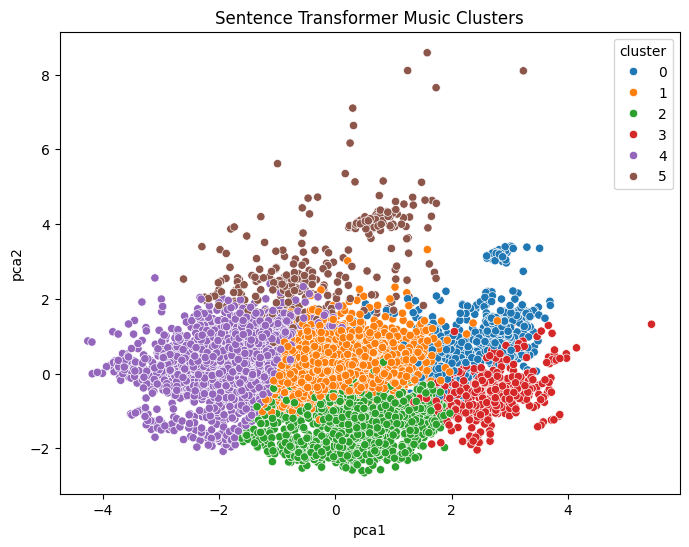

In [39]:
%pip install seaborn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    palette="tab10",
    data=df
)
plt.title("Sentence Transformer Music Clusters")
plt.show()


In [40]:
def recommend(track_name, n=5):
    if track_name not in df["track_name"].values:
        return "Track not found"

    cluster_id = df[df["track_name"] == track_name]["cluster"].values[0]

    recs = (
        df[df["cluster"] == cluster_id]
        .sample(n)
        [["track_name", "artist_name", "artist_genres"]]
    )
    return recs


In [41]:
recommend("OMG!", 5)


,track_name,artist_name,artist_genres
2650,Cloud 9 (Slowed),Rohan Saridena,N/A
7098,"Hey, Soul Sister",Train,soft pop
102,Energy,Tolou,N/A
7105,Ron's Victory,Nicholas Hooper,soundtrack
8192,Dawna,Morphine,N/A


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=1.5,
    min_samples=5,
    metric="euclidean"
)

df["cluster_dbscan"] = dbscan.fit_predict(X_combined)


In [43]:
df["cluster_dbscan"].value_counts()


cluster_dbscan
 1    6252
 0    2115
-1     112
 2      73
Name: count, dtype: int64

In [44]:
def recommend_dbscan(track_name, n=5):
    if track_name not in df["track_name"].values:
        return "Track not found"

    cluster_id = df[df["track_name"] == track_name]["cluster_dbscan"].values[0]

    if cluster_id == -1:
        return "This track is an outlier"

    return (
        df[df["cluster_dbscan"] == cluster_id]
        .sample(n)
        [["track_name", "artist_name", "artist_genres"]]
    )


In [45]:
recommend_dbscan("OMG!", 5)

,track_name,artist_name,artist_genres
2516,THATS WHAT I WANT,Lil Nas X,N/A
6829,Fuck You,CeeLo Green,N/A
2686,Rue,girl in red,bedroom pop
2729,Calling My Phone,Lil Tjay,"brooklyn drill, melodic rap"
418,WALKING AWAY,Justin Bieber,"pop, contemporary r&b"


In [46]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
    n_clusters=6,
    linkage="ward"
)

df["cluster_hier"] = agg.fit_predict(X_combined)


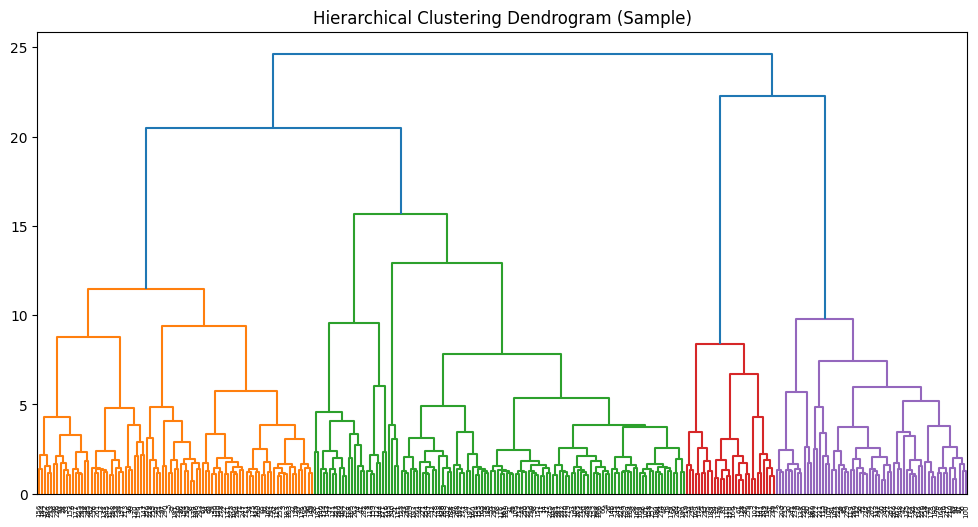

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

sample_idx = np.random.choice(len(X_combined), size=300, replace=False)
Z = linkage(X_combined[sample_idx], method="ward")

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Sample)")
plt.show()


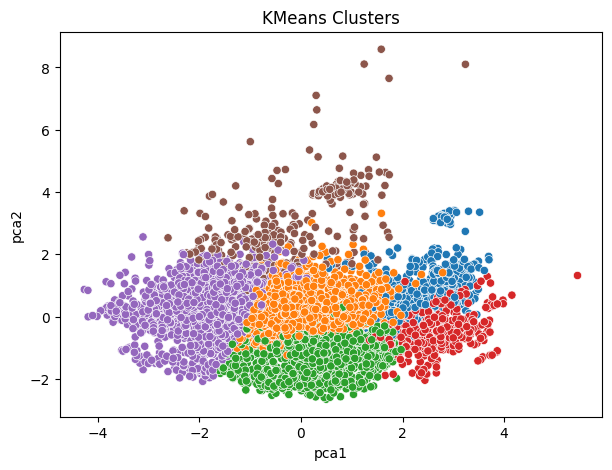

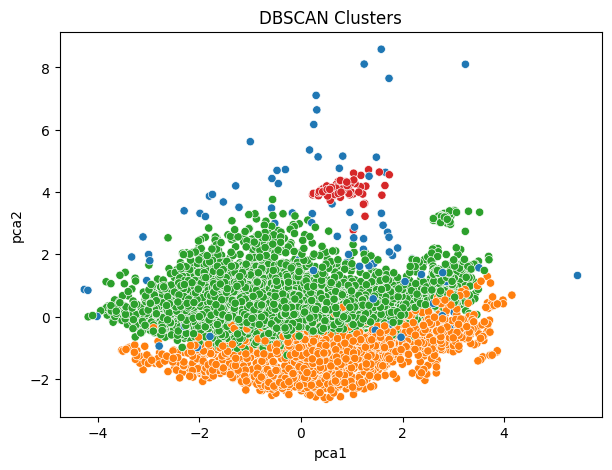

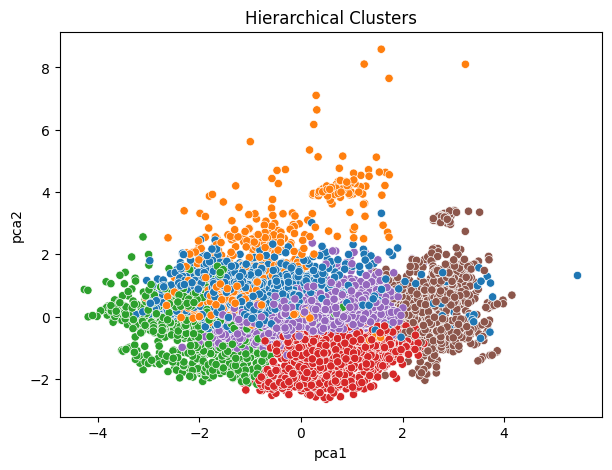

In [48]:
def plot_clusters(label_col, title):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        x="pca1",
        y="pca2",
        hue=label_col,
        palette="tab10",
        data=df,
        legend=False
    )
    plt.title(title)
    plt.show()

plot_clusters("cluster", "KMeans Clusters")
plot_clusters("cluster_dbscan", "DBSCAN Clusters")
plot_clusters("cluster_hier", "Hierarchical Clusters")


In [49]:
from sklearn.metrics import silhouette_score

# Make sure X_combined is the feature matrix used for clustering

# Silhouette Score for KMeans
score_kmeans = silhouette_score(X_combined, df["cluster"])
print(f"Silhouette Score (KMeans): {score_kmeans:.4f}")

# Silhouette Score for Agglomerative Clustering
score_hier = silhouette_score(X_combined, df["cluster_hier"])
print(f"Silhouette Score (Agglomerative): {score_hier:.4f}")

# Silhouette Score for DBSCAN
# Note: DBSCAN can assign -1 to noise points; silhouette_score ignores them automatically
labels_dbscan = df["cluster_dbscan"]
# Check if there are at least 2 clusters (required by silhouette_score)
if len(set(labels_dbscan)) > 1 and len(set(labels_dbscan)) != 1:
    score_dbscan = silhouette_score(X_combined, labels_dbscan)
    print(f"Silhouette Score (DBSCAN): {score_dbscan:.4f}")
else:
    print("DBSCAN did not find enough clusters for silhouette score.")


Silhouette Score (KMeans): 0.2502
Silhouette Score (Agglomerative): 0.2034
Silhouette Score (DBSCAN): 0.2191
